## Simple Linear Regression

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [39]:
 ## Read the dataset
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

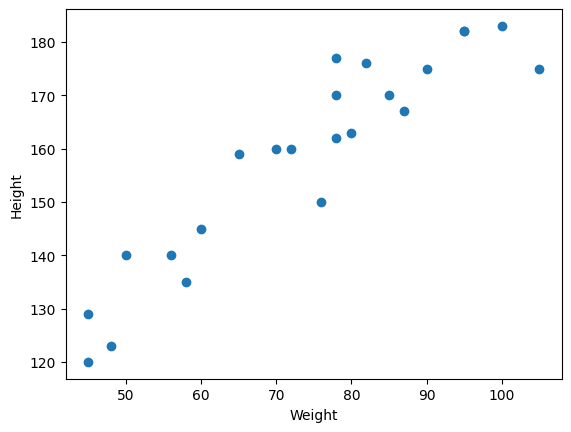

In [ ]:
plt.scatter(df['Weight'],df['Height']) 
plt.xlabel("Weight")
plt.ylabel("Height")

In [43]:
#main aim is to find the best fit line
#steps

# Steps to do machine learning
1. Dataset
2. Divide the feature based on independent and dependent feature
3. Train Test Split of the dataset
4. Standardize the dataset
5. Training the model using LinearRegression

In [71]:
X = df[['Weight']] # independent feature
y = df['Height'] # dependent feature

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [74]:
X.shape

(23, 1)

In [75]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [76]:
#standardization the dataset
#mostly in linear regression, standardization needs to be applied.
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()

In [78]:
X_train

,Weight
12,105
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76


In [79]:
# In this, I will apply zscore on every datapoints on X_train
X_train = scaler.fit_transform(X_train)
# in transform, mean and standard deviation from the xtrain will be utilised for transforming the x_test to avoid the data leakage.
X_test = scaler.transform(X_test)

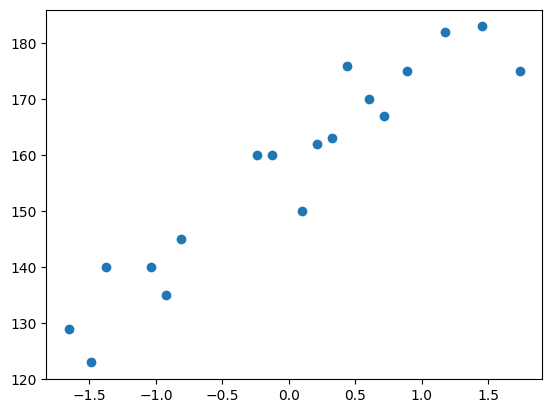

In [80]:
plt.scatter(X_train,y_train)

## train the model

In [81]:
#simple linear regression model
from sklearn.linear_model import LinearRegression

In [82]:
regressor = LinearRegression()

In [83]:
regressor.fit(X_train,y_train)

LinearRegression()

In [86]:
print(f"The slope or coefficient of weight is {regressor.coef_}")
print(f"Intercept is {regressor.intercept_}")

The slope or coefficient of weight is [17.03440872]
Intercept is 157.5


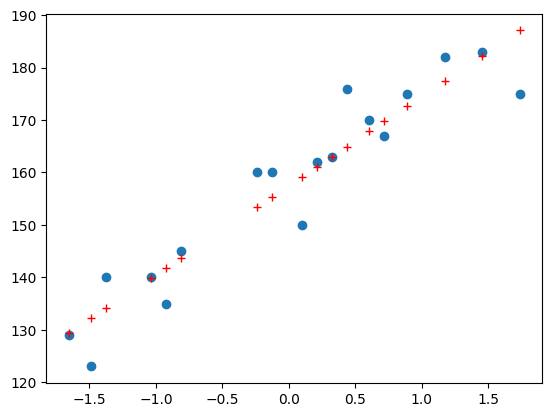

In [97]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r+')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [91]:
y_pred_test = regressor.predict(X_test)

In [92]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

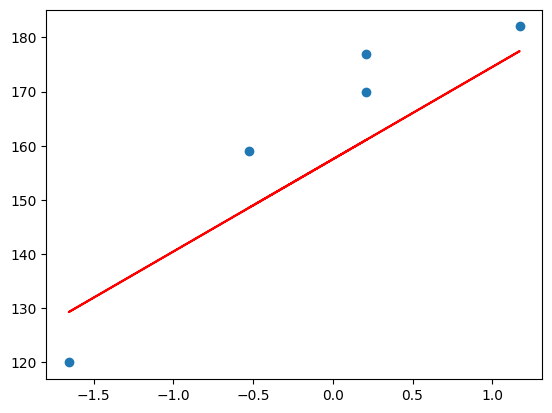

In [95]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

## Performance Metrics

## MSE,MAE,RMSE
## R square and adjusted R square

## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

## Adjusted R Square

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables